<a href="https://colab.research.google.com/github/UmaViraja/PDS/blob/main/DataPredators_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install scikit-fuzzy

#Importing the Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from skfuzzy.cluster import cmeans
import skfuzzy as fuzzy
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

#Load the data

In [44]:
#Loading the dataframe
df1 = pd.read_csv('New Customer Segmentation.csv')
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
# Summary of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              407 non-null    int64 
 1   Gender                  407 non-null    object
 2   Age                     407 non-null    int64 
 3   Annual Income (k$)      407 non-null    int64 
 4   Spending Score (1-100)  407 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.0+ KB


In [46]:
df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,407.000000,407.000000,407.000000,407.000000
mean,204.000000,43.606880,116.186732,52.014742
std,117.635029,16.527265,59.274468,26.948314
min,1.000000,18.000000,15.000000,1.000000
25%,102.500000,31.000000,62.000000,34.000000
50%,204.000000,41.000000,139.000000,51.000000
75%,305.500000,54.500000,174.000000,75.000000
max,407.000000,89.000000,199.000000,100.000000


# Data Preprocessing

In [47]:
#Handling the null values
print(df1.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


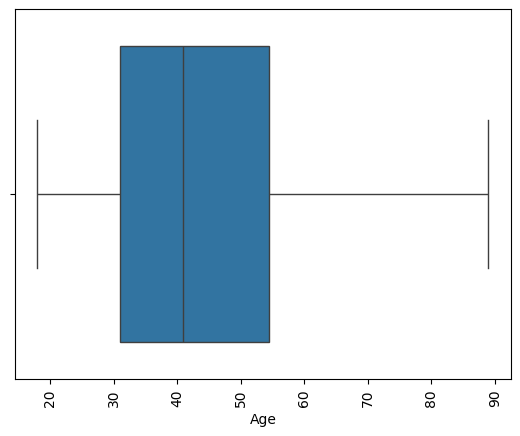

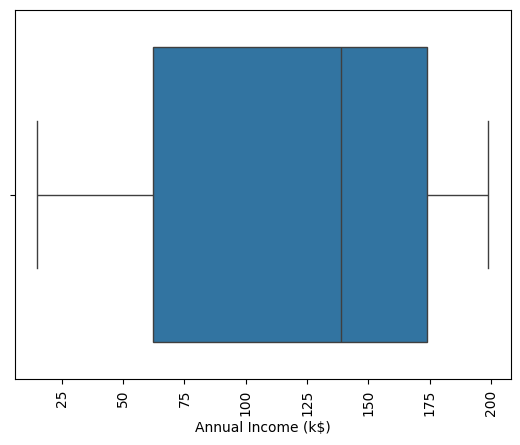

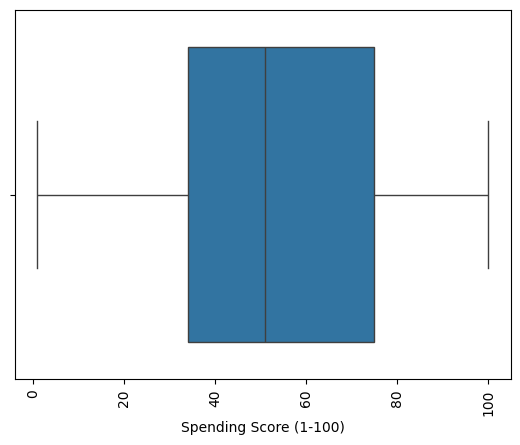

In [48]:
#Outliers
df = df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
for i in df:
  sns.boxplot(data=df, x=i)
  plt.xticks(rotation=90)
  plt.show()

I didn't print the outliers of each column because in the boxplot graph we can see clearly that there is no outlier.

In [49]:
#Label Encoder
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
402,403,0,47,198,43
403,404,1,21,198,82
404,405,1,72,199,59
405,406,1,36,199,99


In [50]:
#Copying the df1 to df2
df2 = df1.copy()
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#standardization

In [51]:
# scale the dataframe
scaler = StandardScaler()
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaled_features = scaler.fit_transform(df2[features_to_scale])

#created the new dataframe
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Adding the customerID and gender columns to the scaled data
df3 = pd.concat([df2[['CustomerID', 'Gender']].reset_index(drop=True), scaled_df], axis=1)

df3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.490698,-1.709189,-0.483546
1,2,1,-1.369537,-1.709189,1.076911
2,3,0,-1.430118,-1.692298,-1.709620
3,4,0,-1.248376,-1.692298,0.928296
4,5,0,-0.763732,-1.675406,-0.446393


#Model Implementation

[5619550.749385754, 1405501.4581608572, 625227.8695953162, 352373.5977830268, 225605.29200620422, 157357.49787283633, 116045.63108894386, 88821.75450372192, 70850.1577052637, 57382.55626184521]


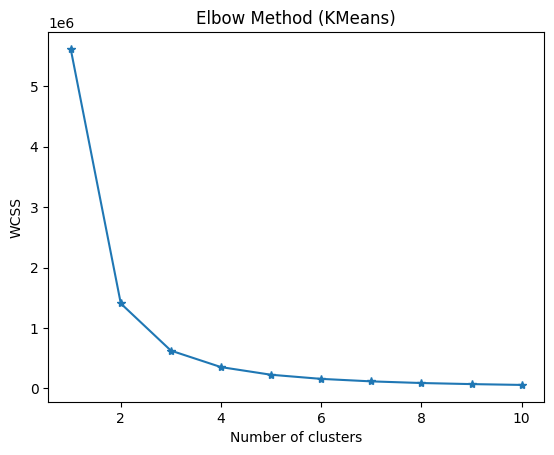

In [52]:
#Elbow-within cluster sum of squares
wcss = []
k=[1,2,3,4,5,6,7,8,9,10]
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(df3)
    wcss.append(model.inertia_)
print(wcss)

plt.plot(k, wcss, '*-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method (KMeans)')
plt.show()


it shows k=3 is a effective choice

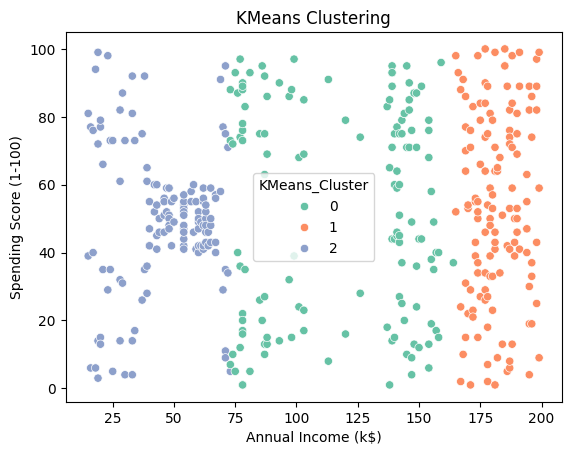

In [53]:
#kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df2['KMeans_Cluster'] = kmeans.fit_predict(df3)
#ploting low,mid,high by setting the palette as set2
sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)' , hue='KMeans_Cluster', palette='Set2')
plt.title('KMeans Clustering')
plt.show()

evaluation metrics

In [54]:
#Silhouette Score
sil_km = silhouette_score(df3, df2['KMeans_Cluster'])
print('Silhouette Score (KMeans):', sil_km)
#Davies-Bouldin Index Score
dbi_km = davies_bouldin_score(df3, df2['KMeans_Cluster'])
print('Davies-Bouldin Index (KMeans):', dbi_km)
#Calinski-Harabasz Index Score
ch_km = calinski_harabasz_score(df3, df2['KMeans_Cluster'])
print('Calinski-Harabasz Index:', ch_km)

Silhouette Score (KMeans): 0.5861834364283742
Davies-Bouldin Index (KMeans): 0.5010999885621138
Calinski-Harabasz Index: 1613.5889964463224


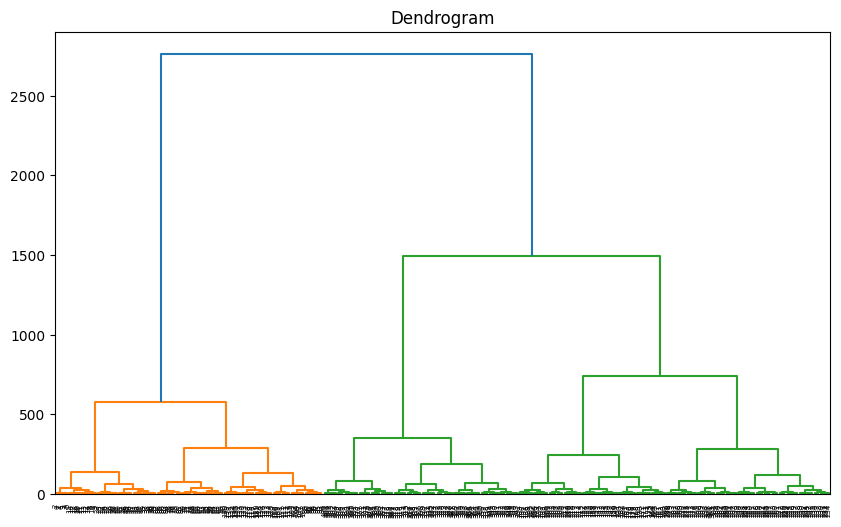

In [55]:
#Dendrogram
plt.figure(figsize=(10,6))
#merges clusters to minimize variance
sch.dendrogram(sch.linkage(df3, method='ward'))
plt.title('Dendrogram')
plt.show()

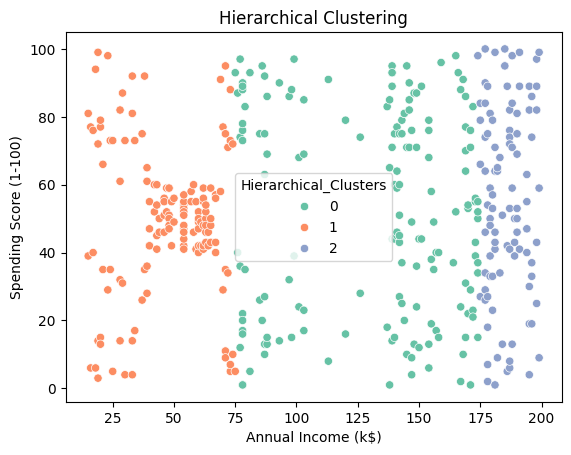

In [56]:
#Hierarchical clustering
hier_cluster = AgglomerativeClustering(n_clusters=3)
labels = hier_cluster.fit_predict(df3)
df2['Hierarchical_Clusters'] = labels
#ploting low,mid,high by setting the palette as set2
sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Clusters', palette='Set2')
plt.title('Hierarchical Clustering')
plt.show()

In [57]:
#Silhouette Score
sil_hier = silhouette_score(df3, labels)
print('Silhouette Score (Hierarchical):', sil_hier)
#Davies-Bouldin Index Score
dbi_hier = davies_bouldin_score(df3, labels)
print('Davies-Bouldin Index (Hierarchical):', dbi_hier)
#Calinski-Harabasz Index Score
ch_hier = calinski_harabasz_score(df3, labels)
print('Calinski-Harabasz Index:', ch_hier)

Silhouette Score (Hierarchical): 0.5675319247892741
Davies-Bouldin Index (Hierarchical): 0.5010620498652228
Calinski-Harabasz Index: 1441.9032382970624


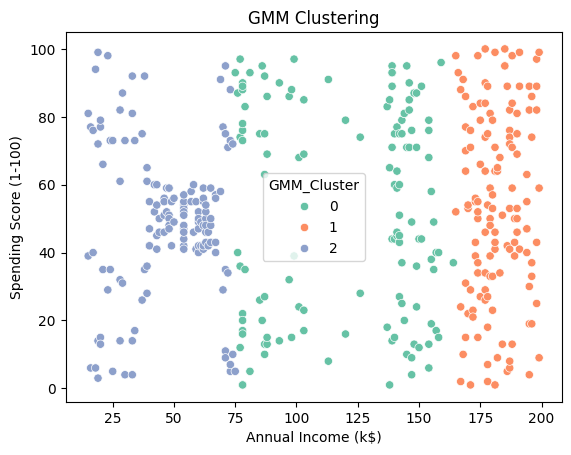

In [58]:
#Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
df2['GMM_Cluster'] = gmm.fit_predict(df2)
#ploting low,mid,high by setting the palette as set2
sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)', hue='GMM_Cluster', palette='Set2')
plt.title('GMM Clustering')
plt.show()

In [59]:
#Silhouette Score
sil_gmm = silhouette_score(df3, df2['GMM_Cluster'])
print('Silhouette Score (GMM):', sil_gmm)
#Davies-Bouldin Index Score
dbi_gmm = davies_bouldin_score(df3, df2['GMM_Cluster'])
print('Davies-Bouldin Index (GMM):', dbi_gmm)
#Calinski-Harabasz Index Score
ch_gmm = calinski_harabasz_score(df3, df2['GMM_Cluster'])
print('Calinski-Harabasz Index:', ch_gmm)

Silhouette Score (GMM): 0.5843248011472926
Davies-Bouldin Index (GMM): 0.5011402360417329
Calinski-Harabasz Index: 1606.5683044624604


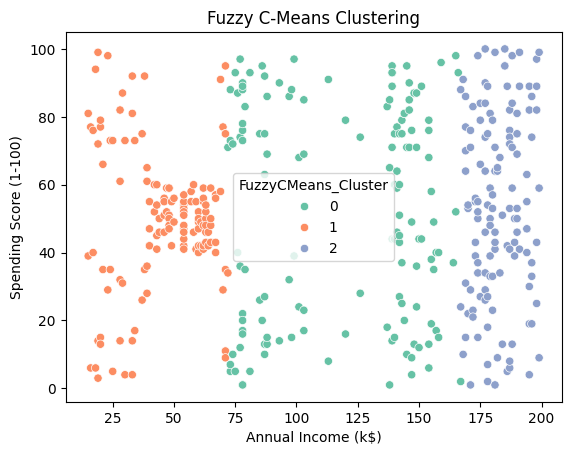

In [60]:
#fuzzyCmeans
df_fuzz = df3.T
cntr,u,u0,d,jm,p,fpc = cmeans(df_fuzz, c=3, m=2, error=0.005, maxiter=1000, init=None, seed=42)

cluster_labels = np.argmax(u, axis=0)
df2['FuzzyCMeans_Cluster'] = cluster_labels
#ploting low,mid,high by setting the palette as set2
sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)', hue='FuzzyCMeans_Cluster', palette='Set2')
plt.title('Fuzzy C-Means Clustering')
plt.show()

In [61]:
#Silhouette Score
sil_fuzzy = silhouette_score(df3, df2['FuzzyCMeans_Cluster'])
print('Silhouette Score (Fuzzy C-Means):', sil_fuzzy)
#Davies-Bouldin Index Score
dbi_fuzzy = davies_bouldin_score(df3, df2['FuzzyCMeans_Cluster'])
print('Davies-Bouldin Index (Fuzzy C-Means):', dbi_fuzzy)
#Calinski-Harabasz Index Score
ch_fuzzy = calinski_harabasz_score(df3, df2['FuzzyCMeans_Cluster'])
print('Calinski-Harabasz Index:', ch_fuzzy)

Silhouette Score (Fuzzy C-Means): 0.5862598013165121
Davies-Bouldin Index (Fuzzy C-Means): 0.5011233108267973
Calinski-Harabasz Index: 1609.6083502774386


In [62]:
#Printing Silhouette Score of all models
print('Silhouette Score (KMeans):', sil_km)
print('Silhouette Score (Hierarchical):', sil_hier)
print('Silhouette Score (GMM):', sil_gmm)
print('Silhouette Score (Fuzzy C-Means):', sil_fuzzy)

Silhouette Score (KMeans): 0.5861834364283742
Silhouette Score (Hierarchical): 0.5675319247892741
Silhouette Score (GMM): 0.5843248011472926
Silhouette Score (Fuzzy C-Means): 0.5862598013165121


In [63]:
#Printing Davies-Bouldin Index Score of all models
print('Davies-Bouldin Index (KMeans):', dbi_km)
print('Davies-Bouldin Index (Hierarchical):', dbi_hier)
print('Davies-Bouldin Index (GMM):', dbi_gmm)
print('Davies-Bouldin Index (Fuzzy C-Means):', dbi_fuzzy)

Davies-Bouldin Index (KMeans): 0.5010999885621138
Davies-Bouldin Index (Hierarchical): 0.5010620498652228
Davies-Bouldin Index (GMM): 0.5011402360417329
Davies-Bouldin Index (Fuzzy C-Means): 0.5011233108267973


In [64]:
#Printing Calinski-Harabasz Index Score of all models
print('Calinski-Harabasz Index:', ch_km)
print('Calinski-Harabasz Index:', ch_hier)
print('Calinski-Harabasz Index:', ch_gmm)
print('Calinski-Harabasz Index:', ch_fuzzy)

Calinski-Harabasz Index: 1613.5889964463224
Calinski-Harabasz Index: 1441.9032382970624
Calinski-Harabasz Index: 1606.5683044624604
Calinski-Harabasz Index: 1609.6083502774386


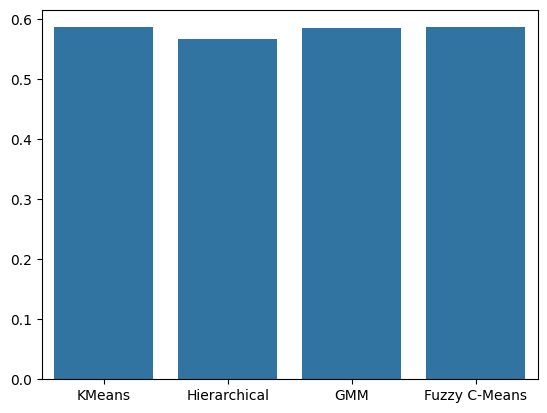

In [65]:
#Silhouette Score
sns.barplot(x=['KMeans', 'Hierarchical', 'GMM', 'Fuzzy C-Means'], y=[sil_km, sil_hier, sil_gmm, sil_fuzzy])
plt.show()

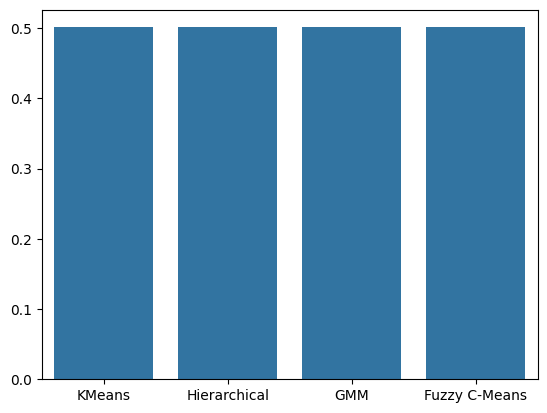

In [66]:
#Davies-Bouldin Index Score
sns.barplot(x=['KMeans', 'Hierarchical', 'GMM', 'Fuzzy C-Means'], y=[dbi_km, dbi_hier, dbi_gmm, dbi_fuzzy])
plt.show()

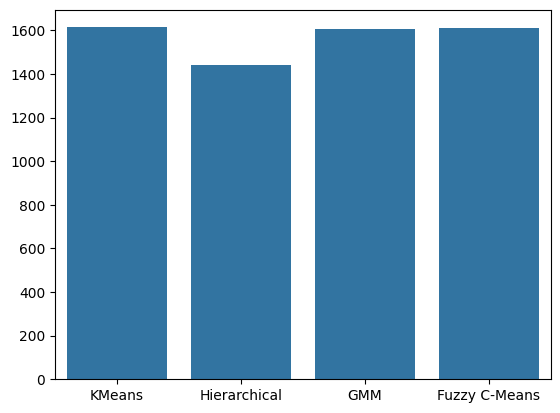

In [67]:
#Calinski-Harabasz Index Score
sns.barplot(x=['KMeans', 'Hierarchical', 'GMM', 'Fuzzy C-Means'], y=[ch_km, ch_hier, ch_gmm, ch_fuzzy])
plt.show()

In [68]:
print(df2)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1   19                  15                      39   
1             2       1   21                  15                      81   
2             3       0   20                  16                       6   
3             4       0   23                  16                      77   
4             5       0   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
402         403       0   47                 198                      43   
403         404       1   21                 198                      82   
404         405       1   72                 199                      59   
405         406       1   36                 199                      99   
406         407       0   41                 199                       9   

     KMeans_Cluster  Hierarchical_Clusters  GMM_Cluster  FuzzyCMeans_Cluster  
0       

In [69]:
#Adding the best model clustering column to the df1 dataframe
df1 = pd.concat([df1, df2['FuzzyCMeans_Cluster']], axis=1)
print(df1)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1   19                  15                      39   
1             2       1   21                  15                      81   
2             3       0   20                  16                       6   
3             4       0   23                  16                      77   
4             5       0   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
402         403       0   47                 198                      43   
403         404       1   21                 198                      82   
404         405       1   72                 199                      59   
405         406       1   36                 199                      99   
406         407       0   41                 199                       9   

     FuzzyCMeans_Cluster  
0                      1  
1                      1  
2     

drop unwanted coulumns expected the best clustering and and print clusters to check which customer id's are present

In [70]:
#printing the customer id's in each cluster
print("Customer id's in Cluster1 : ",df1[df1['FuzzyCMeans_Cluster'] == 0].sort_values(by='Spending Score (1-100)')['CustomerID'].values)
print("Customer id's in Cluster2 : ", df1[df1['FuzzyCMeans_Cluster'] == 1].sort_values(by='Spending Score (1-100)')['CustomerID'].values)
print("Customer id's in Cluster3 : ", df1[df1['FuzzyCMeans_Cluster'] == 2].sort_values(by='Spending Score (1-100)')['CustomerID'].values)

Customer id's in Cluster1 :  [159 157 201 274 240 163 135 141 257 137 193 242 173 139 234 251 145 244
 171 259 175 179 210 211 183 177 267 155 195 266 189 151 199 261 167 153
 230 149 191 247 187 227 165 224 169 197 181 161 264 147 249 270 226 260
 185 143 265 268 222 252 214 253 206 225 216 219 263 241 223 271 262 218
 213 221 170 217 203 258 188 178 192 233 207 134 248 238 140 138 160 198
 148 220 172 166 228 212 243 256 154 215 158 255 229 196 231 232 236 162
 200 239 202 190 176 182 250 144 245 246 184 152 136 254 204 156 180 237
 150 194 174 142 273 205 209 164 168 208 235 269 146 186 272]
Customer id's in Cluster2 :  [  9  31  33  23   7   3 131 129  15  25  35  11  13  37  39  45  19 125
  29  27 133 127  41  17  21  43   1 122   5  94  83 101  56  92  72  80
 113  49 106  50  95  99 117 109 119  84  55  90  58  60 108 114  86  97
  75  70  48  68  78 102 110 115 100  93  73 107  98  67  57 116  65  59
  81  96  51  79 111  63  77  76 112  53 104  47  62  88  82  71  91  61
 121